In [ ]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
movie = pd.read_csv("C:/Users/sravanthi/Downloads/my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
s=(movie.dtypes == "object")
object_cols=list(s[s].index)
object_cols

['V1', 'V2', 'V3', 'V4', 'V5']

In [ ]:
df_movie = movie.iloc[:,5:15]
df_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_movie , min_support=0.15,use_colnames=True,verbose=1)
frequent_itemsets.head()

Processing 27 combinations | Sampling itemset size 3


C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [ ]:
frequent_itemsets.sort_values("support",ascending = False).shape

(13, 2)

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [ ]:
rules[(rules.support > 0.015)&(rules.confidence>0.4)].sort_values("confidence",ascending=False).shape

(15, 9)

In [ ]:
rules["lhs items"]=rules["antecedents"].apply(lambda x:len(x))
rules[rules["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

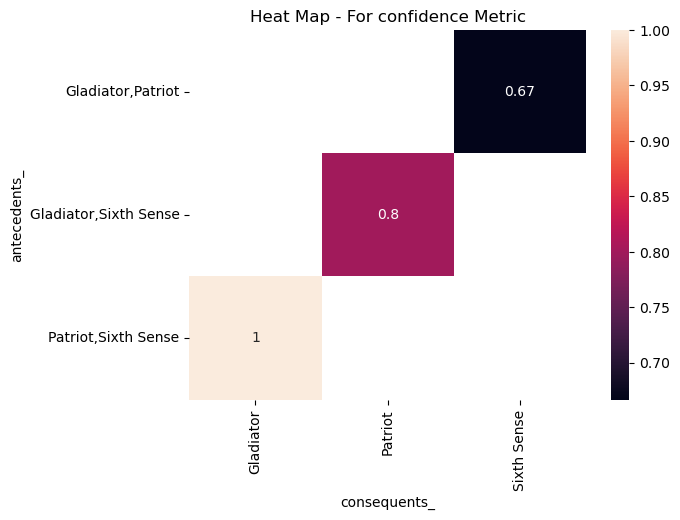

In [ ]:
rules["antecedents_"]=rules["antecedents"].apply(lambda a:",".join(list(a)))
rules["consequents_"]=rules["consequents"].apply(lambda a:",".join(list(a)))
pivot =rules[rules["lhs items"]>1].pivot(index="antecedents_", columns = "consequents_",values="confidence")
sns.heatmap(pivot,annot=True)
plt.title("Heat Map - For confidence Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
rules_li = association_rules(frequent_itemsets, metric="lift",min_threshold=0.8)
rules_li.shape

(16, 9)

In [ ]:
rules_li["lhs items"] = rules_li["antecedents"].apply(lambda x:len(x))
rules_li[rules_li["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

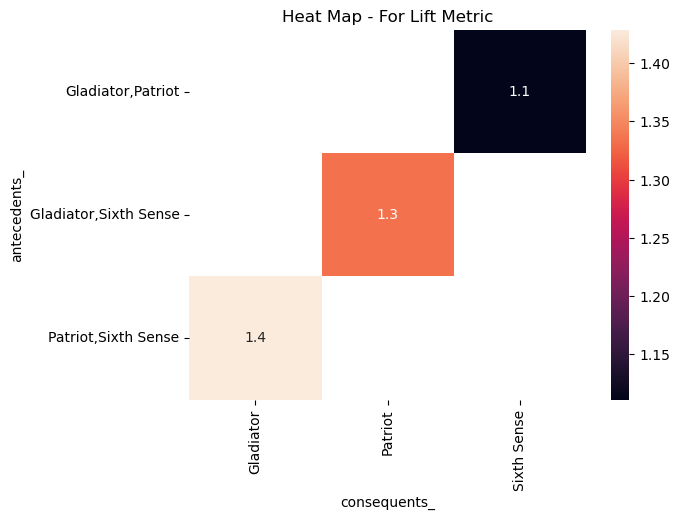

In [ ]:
rules_li["antecedents_"]=rules_li["antecedents"].apply(lambda a:",".join(list(a)))
rules_li["consequents_"]=rules_li["consequents"].apply(lambda a:",".join(list(a)))
pivot=rules_li[rules_li["lhs items"]>1].pivot(index ="antecedents_",columns="consequents_",values="lift")
sns.heatmap(pivot,annot =True)
plt.title("Heat Map - For Lift Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
frequent_itemsets_fp=fpgrowth(df_movie,min_support=0.1,use_colnames=True,verbose=1)
frequent_itemsets_fp.shape

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)


C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(53, 2)

In [ ]:
frequent_itemsets_fp.sort_values("support",ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [ ]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence",min_threshold=0.8)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
2,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,"(Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [ ]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence >0.4)].sort_values("confidence",ascending=False).shape

(8, 9)

In [ ]:
rules_fp["lhs items"]=rules_fp["antecedents"].apply(lambda x:len(x))
rules_fp[rules_fp["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
126,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
45,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
85,"(Green Mile, LOTR2, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
84,"(Green Mile, LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
83,"(Green Mile, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Green Mile,Harry Potter1'),
  Text(6.5, 0, 'Green Mile,LOTR1,Harry Potter1'),
  Text(8.5, 0, 'Green Mile,LOTR2'),
  Text(10.5, 0, 'Green Mile,LOTR2,LOTR1'),
  Text(12.5, 0, 'Green Mile,Sixth Sense'),
  Text(14.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(16.5, 0, 'LOTR,Sixth Sense'),
  Text(18.5, 0, 'LOTR1,Harry Potter1'),
  Text(20.5, 0, 'LOTR1,Sixth Sense'),
  Text(22.5, 0, 'LOTR2,Harry Potter1'),
  Text(24.5, 0, 'LOTR2,LOTR1'),
  Text(26.5, 0, 'LOTR2,Sixth Sense'),
  Text(28.5, 0, 'Sixth Sense')])

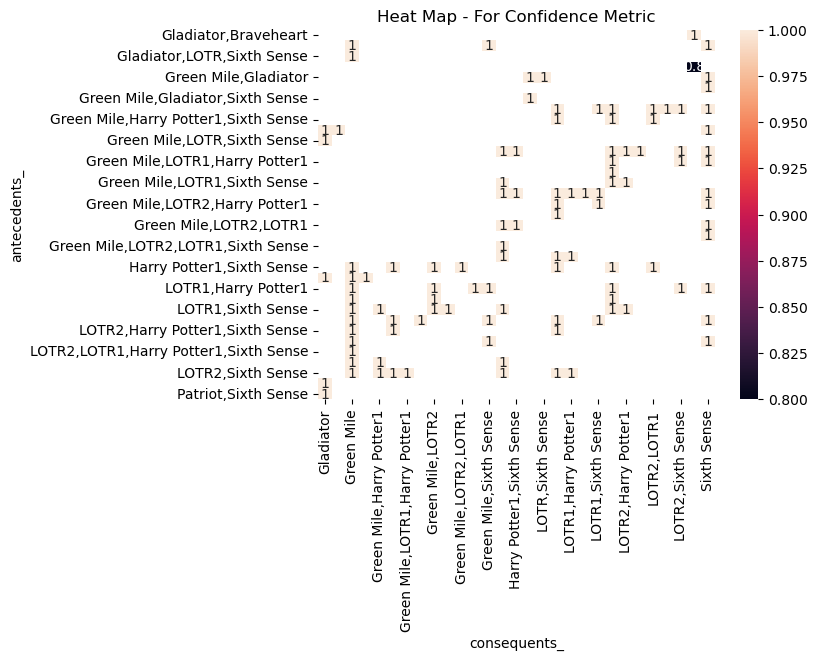

In [ ]:
rules_fp["antecedents_"]=rules_fp["antecedents"].apply(lambda a:",".join(list(a)))
rules_fp["consequents_"]=rules_fp["consequents"].apply(lambda a:",".join(list(a)))
pivot=rules_fp[rules_fp["lhs items"]>1].pivot(index="antecedents_",columns="consequents_",values="confidence")
sns.heatmap(pivot,annot=True)
plt.title("Heat Map - For Confidence Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
rules_fp_li=association_rules(frequent_itemsets_fp, metric="lift",min_threshold=0.8)
rules_fp_li.shape

(246, 9)

In [ ]:
rules_fp_li["lhs items"]= rules_fp_li["antecedents"].apply(lambda x:len(x))
rules_fp_li[rules_fp_li["lhs items"]>1].sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
241,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
58,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
176,"(LOTR1, Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
175,"(LOTR2, Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
174,"(Green Mile, LOTR2, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Gladiator,LOTR'),
  Text(4.5, 0, 'Green Mile'),
  Text(6.5, 0, 'Green Mile,Harry Potter1'),
  Text(8.5, 0, 'Green Mile,LOTR'),
  Text(10.5, 0, 'Green Mile,LOTR1,Harry Potter1'),
  Text(12.5, 0, 'Green Mile,LOTR2'),
  Text(14.5, 0, 'Green Mile,LOTR2,LOTR1'),
  Text(16.5, 0, 'Green Mile,Sixth Sense'),
  Text(18.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(20.5, 0, 'LOTR,Sixth Sense'),
  Text(22.5, 0, 'LOTR1,Harry Potter1'),
  Text(24.5, 0, 'LOTR1,Sixth Sense'),
  Text(26.5, 0, 'LOTR2,Harry Potter1'),
  Text(28.5, 0, 'LOTR2,LOTR1'),
  Text(30.5, 0, 'LOTR2,LOTR1,Sixth Sense'),
  Text(32.5, 0, 'Patriot')])

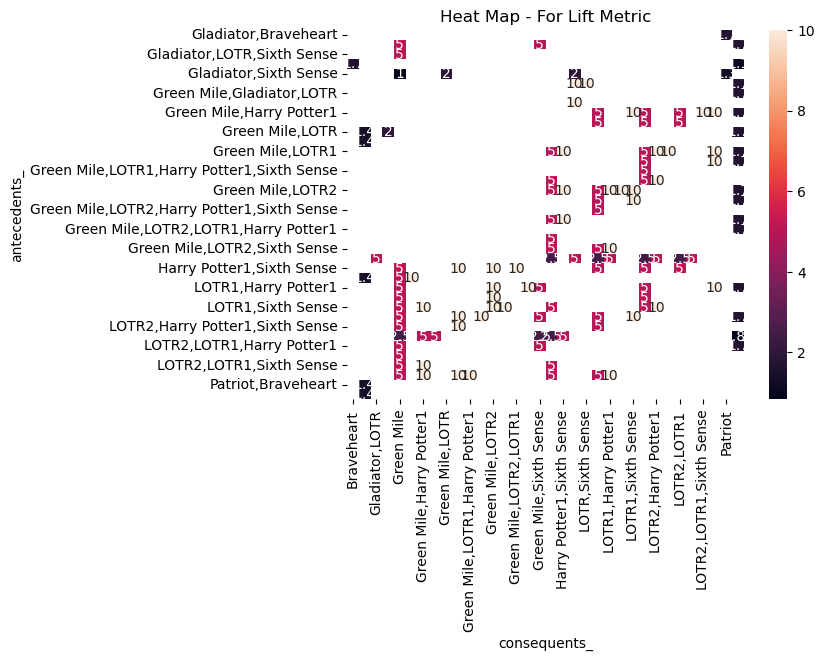

In [ ]:
rules_fp_li["antecedents_"]= rules_fp_li["antecedents"].apply(lambda a:",".join(list(a)))
rules_fp_li["consequents_"]= rules_fp_li["consequents"].apply(lambda a:",".join(list(a)))
pivot=rules_fp_li[rules_fp_li["lhs items"]>1].pivot(index = "antecedents_",columns="consequents_",values="lift")
sns.heatmap(pivot, annot= True)
plt.title("Heat Map - For Lift Metric")
plt.yticks(rotation=0)
plt.xticks(rotation=90)